https://www.kaggle.com/niharika41298/netflix-visualizations-recommendation-eda

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt

### Loading the dataset

In [2]:
#마운트
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#데이터 로드 경로 지정
import os
path = '/content/drive/MyDrive/Colab Notebooks/data/' # 폴더 경로
os.chdir(path) # 해당 폴더로 이동

In [4]:
netflix_overall=pd.read_csv("netflix_titles.csv")
netflix_overall.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [5]:
netflix_overall.count()

show_id         7787
type            7787
title           7787
director        5398
cast            7069
country         7280
date_added      7777
release_year    7787
rating          7780
duration        7787
listed_in       7787
description     7787
dtype: int64

In [6]:
netflix_shows=netflix_overall[netflix_overall['type']=='TV Show']
netflix_shows.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
5,s6,TV Show,46,Serdar Akar,"Erdal Beşikçioğlu, Yasemin Allen, Melis Birkan...",Turkey,"July 1, 2017",2016,TV-MA,1 Season,"International TV Shows, TV Dramas, TV Mysteries",A genetics professor experiments with a treatm...
11,s12,TV Show,1983,NaN,"Robert Więckiewicz, Maciej Musiał, Michalina O...","Poland, United States","November 30, 2018",2018,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Dramas","In this dark alt-history thriller, a naïve law..."
12,s13,TV Show,1994,Diego Enrique Osorno,NaN,Mexico,"May 17, 2019",2019,TV-MA,1 Season,"Crime TV Shows, Docuseries, International TV S...",Archival video and new interviews examine Mexi...
16,s17,TV Show,Feb-09,NaN,"Shahd El Yaseen, Shaila Sabt, Hala, Hanadi Al-...",NaN,"March 20, 2019",2018,TV-14,1 Season,"International TV Shows, TV Dramas","As a psychology professor faces Alzheimer's, h..."


In [7]:
netflix_movies=netflix_overall[netflix_overall['type']=='Movie']
netflix_movies.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...
6,s7,Movie,122,Yasir Al Yasiri,"Amina Khalil, Ahmed Dawood, Tarek Lotfy, Ahmed...",Egypt,"June 1, 2020",2019,TV-MA,95 min,"Horror Movies, International Movies","After an awful accident, a couple admitted to ..."


### Analysis of Movies vs TV Shows

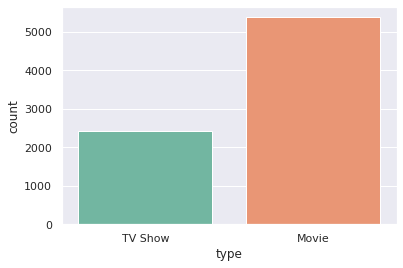

In [8]:
sns.set(style="darkgrid")
ax = sns.countplot(x="type", data=netflix_overall, palette="Set2")

### If a producer wants to release some content, which month must he do so?( Month when least amount of content is added)

findfont: Font family ['calibri'] not found. Falling back to DejaVu Sans.


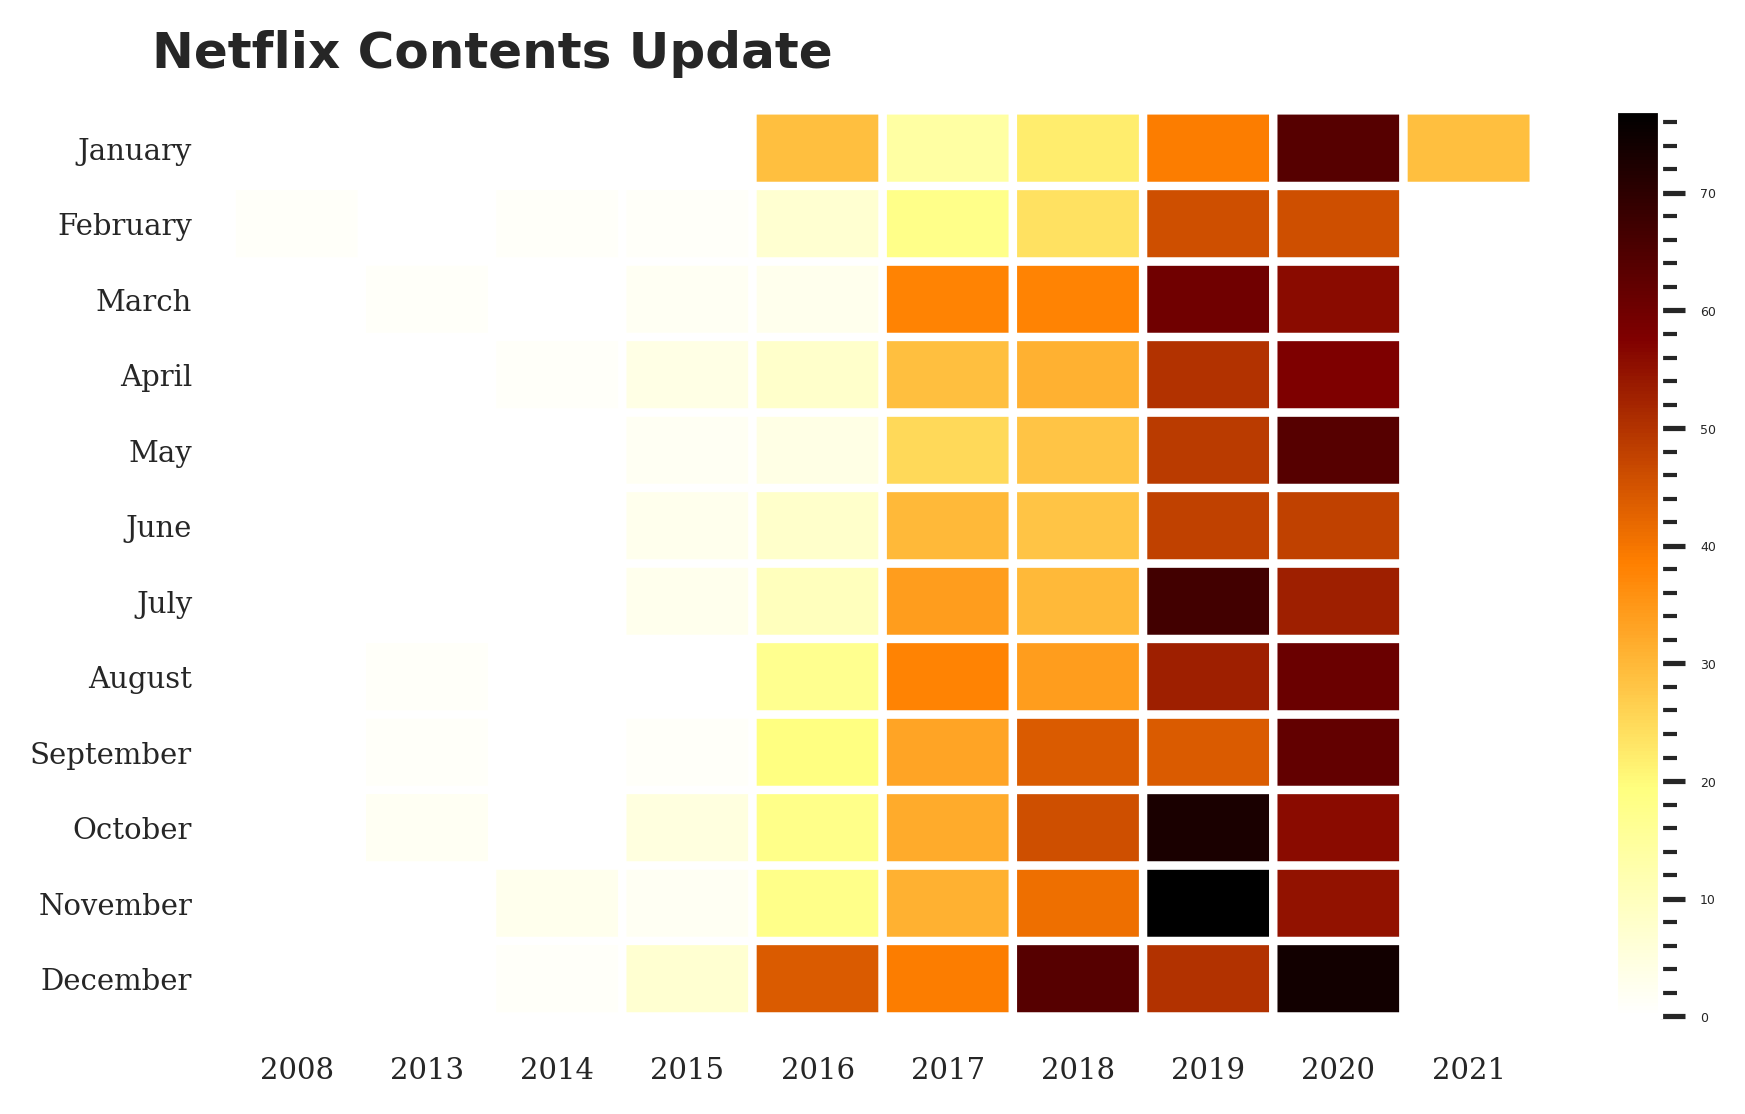

In [9]:
netflix_date = netflix_shows[['date_added']].dropna()
netflix_date['year'] = netflix_date['date_added'].apply(lambda x : x.split(', ')[-1])
netflix_date['month'] = netflix_date['date_added'].apply(lambda x : x.lstrip().split(' ')[0])

month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'][::-1]
df = netflix_date.groupby('year')['month'].value_counts().unstack().fillna(0)[month_order].T
plt.figure(figsize=(7, 4), dpi=300)
plt.pcolor(df, cmap='afmhot_r', edgecolors='white', linewidths=2) # heatmap
plt.xticks(np.arange(0.5, len(df.columns), 1), df.columns, fontsize=7, fontfamily='serif')
plt.yticks(np.arange(0.5, len(df.index), 1), df.index, fontsize=7, fontfamily='serif')

plt.title('Netflix Contents Update', fontsize=12, fontfamily='calibri', fontweight='bold', position=(0.20, 1.0+0.02))
cbar = plt.colorbar()

cbar.ax.tick_params(labelsize=3) 
cbar.ax.minorticks_on()
plt.show()

### Movie ratings analysis

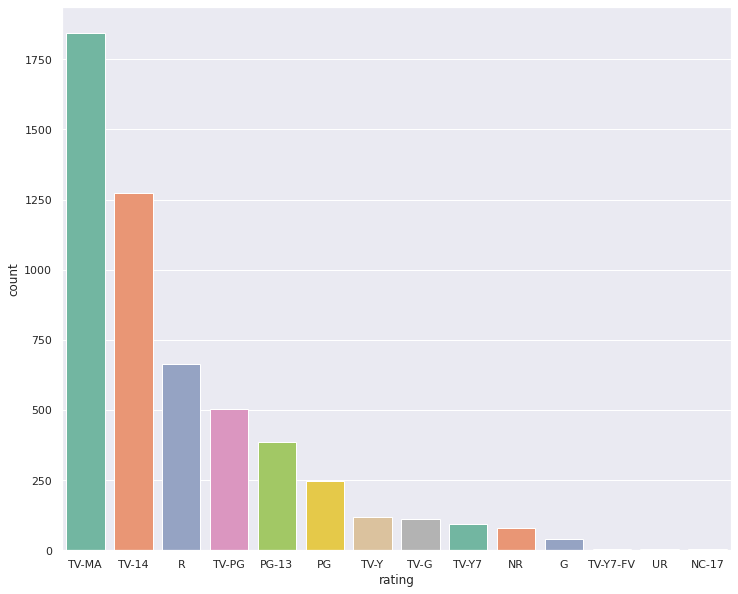

In [10]:
plt.figure(figsize=(12,10))
sns.set(style="darkgrid")
ax = sns.countplot(x="rating", data=netflix_movies, palette="Set2", order=netflix_movies['rating'].value_counts().index[0:15])

### Analysing IMDB ratings to get top rated movies on Netflix

In [11]:
# 미국의 영화 정보 모음 사이트 IMDb
imdb_ratings=pd.read_csv('IMDb ratings.csv',usecols=['weighted_average_vote'])
imdb_titles=pd.read_csv('IMDb movies.csv', usecols=['title','year','genre'])
ratings = pd.DataFrame({'Title':imdb_titles.title,
                    'Release Year':imdb_titles.year,
                    'Rating': imdb_ratings.weighted_average_vote,
                    'Genre':imdb_titles.genre})
ratings.drop_duplicates(subset=['Title','Release Year','Rating'], inplace=True)
ratings.shape

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


(85852, 4)

In [12]:
ratings.dropna()
joint_data=ratings.merge(netflix_overall,left_on='Title',right_on='title',how='inner')
joint_data=joint_data.sort_values(by='Rating', ascending=False)

In [13]:
# Top rated 10 movies on Netflix are:
import plotly.express as px
top_rated=joint_data[0:10]
fig =px.sunburst(
    top_rated,
    path=['title','country'],
    values='Rating',
    color='Rating')
fig.show()

In [14]:
# Countries with highest rated content
country_count=joint_data['country'].value_counts().sort_values(ascending=False)
country_count=pd.DataFrame(country_count)
topcountries=country_count[0:11]
topcountries

,country
United States,799
India,701
United Kingdom,107
Canada,56
Philippines,50
Spain,40
South Korea,36
Indonesia,35
France,33
"United Kingdom, United States",31


In [16]:
country_count

,country
United States,799
India,701
United Kingdom,107
Canada,56
Philippines,50
...,...
"Canada, United States, France",1
"United States, Norway, Canada",1
"India, Pakistan",1
"India, Australia",1


In [15]:
# 위 카운트 시각화
import plotly.express as px
data = dict(
    number=[1063,619,135,60,44,41,40,40,38,35],
    country=["United States", "India", "United Kingdom", "Canada", "Spain",'Turkey','Philippines','France','South Korea','Australia'])
fig = px.funnel(data, x='number', y='country')
fig.show()

### Year wise analysis

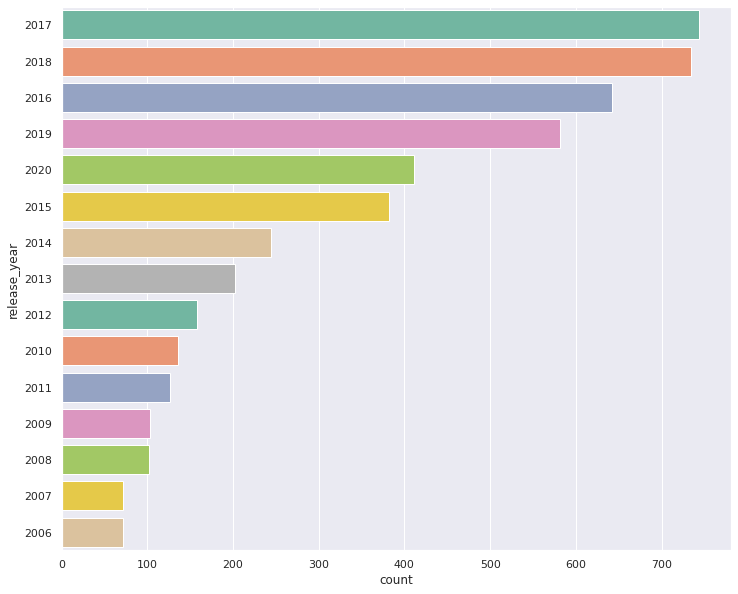

In [17]:
plt.figure(figsize=(12,10))
sns.set(style="darkgrid")
ax = sns.countplot(y="release_year", data=netflix_movies, palette="Set2", 
                   order=netflix_movies['release_year'].value_counts().index[0:15])

In [18]:
countries={}
netflix_movies['country']=netflix_movies['country'].fillna('Unknown')
cou=list(netflix_movies['country'])
for i in cou:
    #print(i)
    i=list(i.split(','))
    if len(i)==1:
        if i in list(countries.keys()):
            countries[i]+=1
        else:
            countries[i[0]]=1
    else:
        for j in i:
            if j in list(countries.keys()):
                countries[j]+=1
            else:
                countries[j]=1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [19]:
countries_fin={}
for country,no in countries.items():
    country=country.replace(' ','')
    if country in list(countries_fin.keys()):
        countries_fin[country]+=no
    else:
        countries_fin[country]=no
        
countries_fin={k: v for k, v in sorted(countries_fin.items(), key=lambda item: item[1], reverse= True)}

### TOP 10 MOVIE CONTENT CREATING COUNTRIES

[Text(0, 0, 'UnitedStates'),
 Text(0, 0, 'France'),
 Text(0, 0, 'UnitedKingdom'),
 Text(0, 0, 'Canada'),
 Text(0, 0, 'Germany'),
 Text(0, 0, 'Belgium'),
 Text(0, 0, 'China'),
 Text(0, 0, 'Spain'),
 Text(0, 0, 'India'),
 Text(0, 0, 'Japan')]

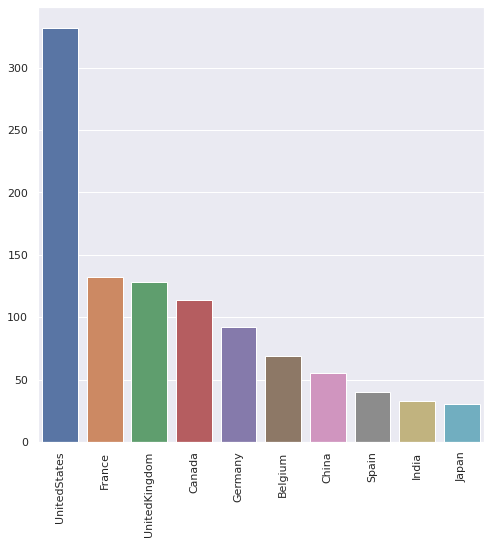

In [20]:
plt.figure(figsize=(8,8))
ax = sns.barplot(x=list(countries_fin.keys())[0:10],y=list(countries_fin.values())[0:10])
ax.set_xticklabels(list(countries_fin.keys())[0:10],rotation = 90)

### Analysis of duration of movies

In [21]:
netflix_movies['duration']=netflix_movies['duration'].str.replace(' min','')
netflix_movies['duration']=netflix_movies['duration'].astype(str).astype(int)
netflix_movies['duration']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



1        93
2        78
3        80
4       123
6        95
       ... 
7781     88
7782     99
7783    111
7784     44
7786     90
Name: duration, Length: 5377, dtype: int64

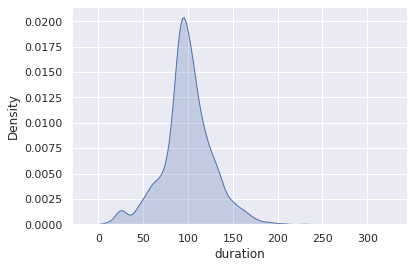

In [22]:
sns.set(style="darkgrid")
sns.kdeplot(data=netflix_movies['duration'], shade=True)

In [23]:
from collections import Counter

genres=list(netflix_movies['listed_in'])
gen=[]

for i in genres:
    i=list(i.split(','))
    for j in i:
        gen.append(j.replace(' ',""))
g=Counter(gen)

In [24]:
g

Counter({'Action&Adventure': 721,
         'AnimeFeatures': 57,
         'Children&FamilyMovies': 532,
         'ClassicMovies': 103,
         'Comedies': 1471,
         'CultMovies': 59,
         'Documentaries': 786,
         'Dramas': 2106,
         'Faith&Spirituality': 57,
         'HorrorMovies': 312,
         'IndependentMovies': 673,
         'InternationalMovies': 2437,
         'LGBTQMovies': 90,
         'Movies': 56,
         'Music&Musicals': 321,
         'RomanticMovies': 531,
         'Sci-Fi&Fantasy': 218,
         'SportsMovies': 196,
         'Stand-UpComedy': 329,
         'Thrillers': 491})

### WordCloud for Genres

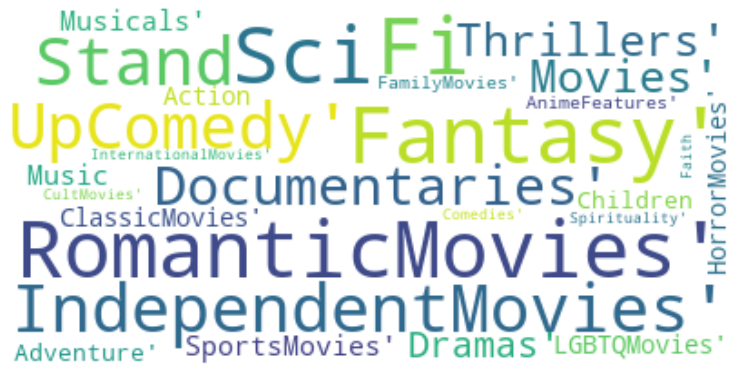

In [27]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image

text = list(set(gen))
plt.rcParams['figure.figsize'] = (13, 13)

#assigning shape to the word cloud
# mask = np.array(Image.open('../input/masks/star.png'))
wordcloud = WordCloud(max_words=1000000,background_color="white").generate(str(text)) #,mask=mask

plt.imshow(wordcloud,interpolation="bilinear")
plt.axis("off")
plt.show()

### Lollipop plot of Genres vs their count on Netflix

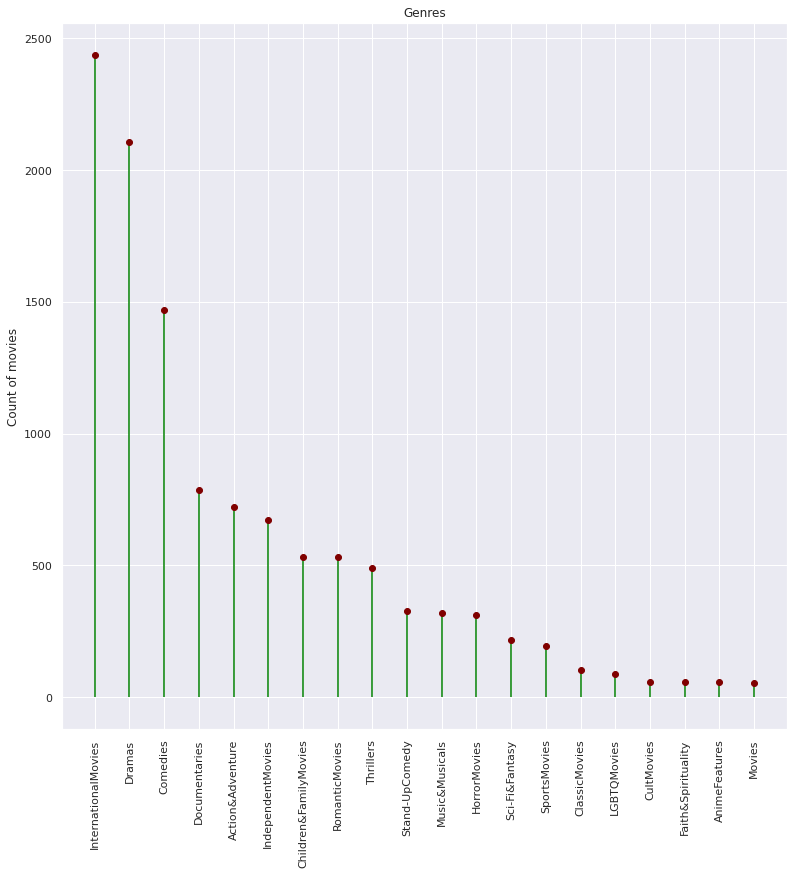

<Figure size 720x720 with 0 Axes>

In [28]:
g={k: v for k, v in sorted(g.items(), key=lambda item: item[1], reverse= True)}


fig, ax = plt.subplots()

fig = plt.figure(figsize = (10, 10))
x=list(g.keys())
y=list(g.values())
ax.vlines(x, ymin=0, ymax=y, color='green')
ax.plot(x,y, "o", color='maroon')
ax.set_xticklabels(x, rotation = 90)
ax.set_ylabel("Count of movies")
# set a title
ax.set_title("Genres");

### Analysis of TV SERIES on Netflix

In [29]:
countries1={}
netflix_shows['country']=netflix_shows['country'].fillna('Unknown')
cou1=list(netflix_shows['country'])
for i in cou1:
    #print(i)
    i=list(i.split(','))
    if len(i)==1:
        if i in list(countries1.keys()):
            countries1[i]+=1
        else:
            countries1[i[0]]=1
    else:
        for j in i:
            if j in list(countries1.keys()):
                countries1[j]+=1
            else:
                countries1[j]=1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [30]:
countries_fin1={}
for country,no in countries1.items():
    country=country.replace(' ','')
    if country in list(countries_fin1.keys()):
        countries_fin1[country]+=no
    else:
        countries_fin1[country]=no
        
countries_fin1={k: v for k, v in sorted(countries_fin1.items(), key=lambda item: item[1], reverse= True)}

In [31]:
countries_fin1

{'Argentina': 2,
 'Australia': 9,
 'Austria': 1,
 'Azerbaijan': 1,
 'Belarus': 1,
 'Belgium': 4,
 'Brazil': 3,
 'Canada': 44,
 'Chile': 2,
 'China': 8,
 'Colombia': 6,
 'Croatia': 1,
 'Cuba': 1,
 'Cyprus': 1,
 'CzechRepublic': 6,
 'Denmark': 3,
 'Egypt': 2,
 'Finland': 4,
 'France': 26,
 'Germany': 19,
 'Greece': 2,
 'HongKong': 3,
 'Hungary': 1,
 'Iceland': 1,
 'India': 3,
 'Indonesia': 2,
 'Ireland': 8,
 'Israel': 2,
 'Italy': 8,
 'Japan': 23,
 'Jordan': 1,
 'Kuwait': 2,
 'Lebanon': 2,
 'Luxembourg': 1,
 'Malaysia': 2,
 'Malta': 1,
 'Mauritius': 1,
 'Mexico': 10,
 'Netherlands': 4,
 'NewZealand': 7,
 'Nigeria': 1,
 'Norway': 1,
 'Pakistan': 1,
 'Philippines': 1,
 'Poland': 2,
 'PuertoRico': 1,
 'Russia': 3,
 'SaudiArabia': 1,
 'Senegal': 1,
 'Singapore': 4,
 'SouthAfrica': 6,
 'SouthKorea': 6,
 'Spain': 9,
 'Sweden': 4,
 'Switzerland': 1,
 'Syria': 1,
 'Taiwan': 1,
 'Thailand': 1,
 'Turkey': 1,
 'Ukraine': 1,
 'UnitedArabEmirates': 1,
 'UnitedKingdom': 21,
 'UnitedStates': 85,
 'Unkn

### Most content creating countries

Text(0, 0.5, 'Arrival delay (in minutes)')

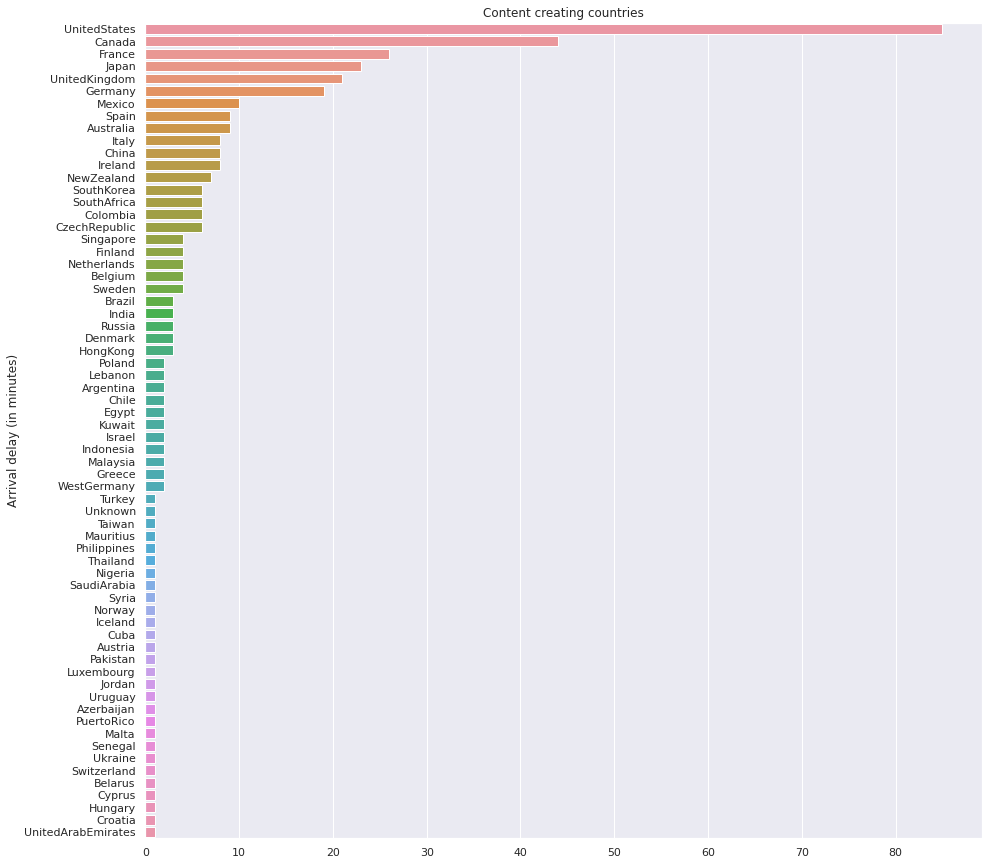

In [32]:
# Set the width and height of the figure
plt.figure(figsize=(15,15))

# Add title
plt.title("Content creating countries")

# Bar chart showing average arrival delay for Spirit Airlines flights by month
sns.barplot(y=list(countries_fin1.keys()), x=list(countries_fin1.values()))

# Add label for vertical axis
plt.ylabel("Arrival delay (in minutes)")

In [33]:
features=['title','duration']
durations= netflix_shows[features]

durations['no_of_seasons']=durations['duration'].str.replace(' Season','')

#durations['no_of_seasons']=durations['no_of_seasons'].astype(str).astype(int)
durations['no_of_seasons']=durations['no_of_seasons'].str.replace('s','')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [34]:
durations['no_of_seasons']=durations['no_of_seasons'].astype(str).astype(int)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



### TV shows with largest number of seasons

In [35]:
t=['title','no_of_seasons']
top=durations[t]

top=top.sort_values(by='no_of_seasons', ascending=False)

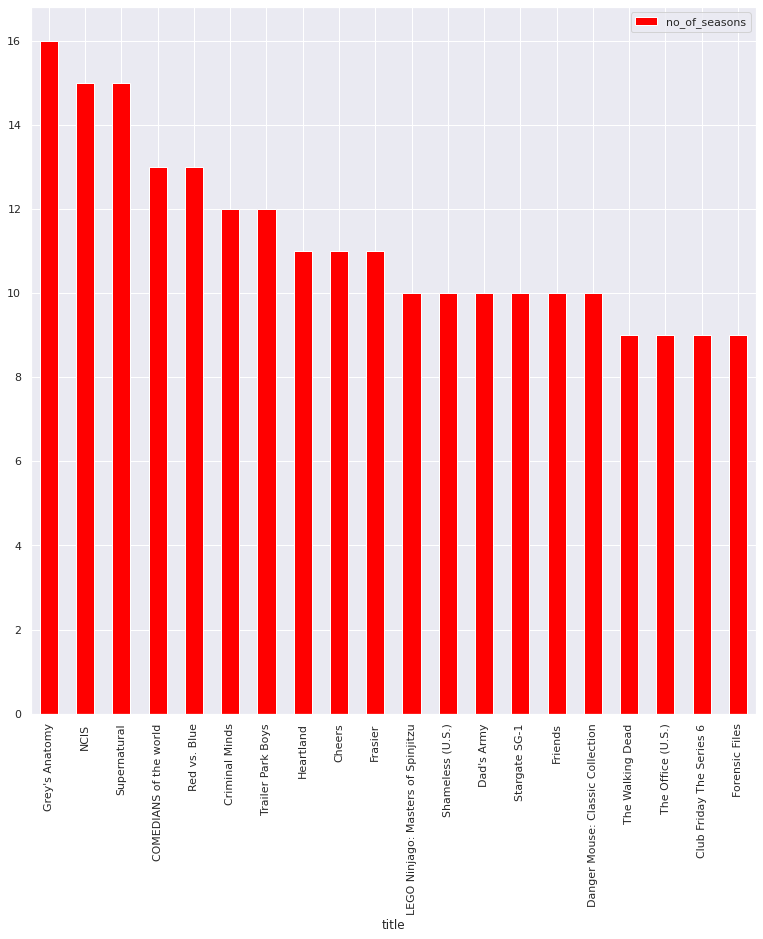

In [36]:
top20=top[0:20]
top20.plot(kind='bar',x='title',y='no_of_seasons', color='red')

### Lowest number of seasons

In [37]:
bottom=top.sort_values(by='no_of_seasons')
bottom=bottom[20:50]

import plotly.graph_objects as go

fig = go.Figure(data=[go.Table(header=dict(values=['Title', 'No of seasons']),
                 cells=dict(values=[bottom['title'],bottom['no_of_seasons']],fill_color='lavender'))
                     ])
fig.show()

In [38]:
genres=list(netflix_shows['listed_in'])
gen=[]

for i in genres:
    i=list(i.split(','))
    for j in i:
        gen.append(j.replace(' ',""))
g=Counter(gen)

### Word Cloud for Genres

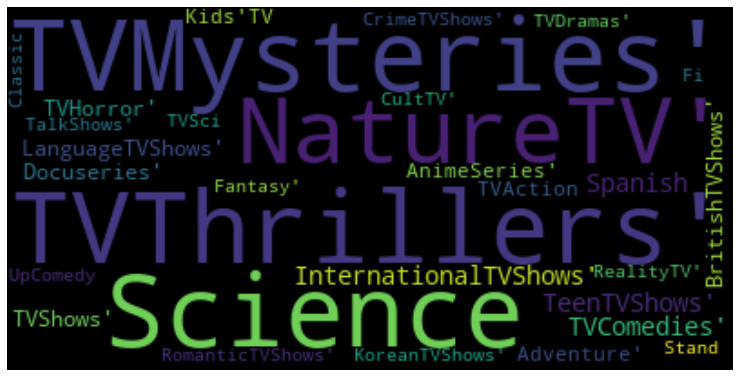

In [39]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

text = list(set(gen))

# mask=np.array(Image.open('../input/masks/upvote.png'))
wordcloud = WordCloud(max_words=1000000,background_color="black").generate(str(text)) #,mask=mask
plt.rcParams['figure.figsize'] = (13, 13)
plt.imshow(wordcloud,interpolation="bilinear")
plt.axis("off")
plt.show()

In [40]:
us_series_data=netflix_shows[netflix_shows['country']=='United States']

In [41]:
oldest_us_series=us_series_data.sort_values(by='release_year')[0:20]

In [42]:
fig = go.Figure(data=[go.Table(header=dict(values=['Title', 'Release Year'],fill_color='paleturquoise'),
                 cells=dict(values=[oldest_us_series['title'],oldest_us_series['release_year']],fill_color='pink'))
                     ])
fig.show()

In [43]:
newest_us_series=us_series_data.sort_values(by='release_year', ascending=False)[0:50]

In [44]:
fig = go.Figure(data=[go.Table(header=dict(values=['Title', 'Release Year'],fill_color='yellow'),
                 cells=dict(values=[newest_us_series['title'],newest_us_series['release_year']],fill_color='lavender'))
                     ])
fig.show()

### Content in France

In [45]:
netflix_fr=netflix_overall[netflix_overall['country']=='France']
nannef=netflix_fr.dropna()
import plotly.express as px
fig = px.treemap(nannef, path=['country','director'],
                  color='director', hover_data=['director','title'],color_continuous_scale='Purples')
fig.show()

In [46]:
newest_fr_series=netflix_fr.sort_values(by='release_year', ascending=False)[0:20]

In [47]:
newest_fr_series

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
6462,s6463,TV Show,The Hook Up Plan,NaN,"Marc Ruchmann, Zita Hanrot, Sabrina Ouazani, J...",France,"October 11, 2019",2020,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...","When Parisian Elsa gets hung up on her ex, her..."
7388,s7389,TV Show,Vampires,NaN,"Oulaya Amamra, Suzanne Clément, Kate Moran, Mo...",France,"March 20, 2020",2020,TV-MA,1 Season,"International TV Shows, TV Dramas, TV Horror","A Paris teen who's half human, half vampire gr..."
3729,s3730,Movie,Lost Bullet,Guillaume Pierret,"Alban Lenoir, Nicolas Duvauchelle, Ramzy Bedia...",France,"June 19, 2020",2020,TV-MA,93 min,"Action & Adventure, Dramas, International Movies","Facing a murder charge, a genius mechanic with..."
7365,s7366,TV Show,Until Dawn,NaN,"Ahmed Sylla, Alban Ivanov, Ornella Fleury, Nat...",France,"January 10, 2020",2020,TV-MA,1 Season,"International TV Shows, Reality TV, TV Comedies",France’s funniest comics carry out ghastly tas...
2414,s2415,Movie,GIMS: On the Record,Florent Bodin,Maître Gims,France,"September 17, 2020",2020,TV-MA,96 min,"Documentaries, International Movies, Music & M...",Go backstage with beloved rap superstar Gims i...
3502,s3503,TV Show,La Révolution,NaN,"Amir El Kacem, Marilou Aussilloux, Lionel Erdo...",France,"October 16, 2020",2020,TV-MA,1 Season,"International TV Shows, TV Action & Adventure,...","In a reimagined history, a mysterious disease ..."
7145,s7146,Movie,Tony Parker: The Final Shot,Florent Bodin,Tony Parker,France,"January 6, 2021",2020,TV-14,99 min,"Documentaries, International Movies, Sports Mo...",This film examines the background and career o...
7498,s7499,Movie,We Are One,Stéphane de Freitas,NaN,France,"July 14, 2020",2020,TV-MA,86 min,"Documentaries, International Movies, Music & M...",Activists around the world fight injustice and...
910,s911,Movie,Bigflo & Oli: Hip Hop Frenzy,"Bigflo & Oli, Jérémie Levypon",Bigflo & Oli,France,"October 8, 2020",2020,TV-MA,100 min,"Documentaries, International Movies, Music & M...",Go backstage with French rap duo Bigflo & Oli ...
2105,s2106,TV Show,Family Business,NaN,"Jonathan Cohen, Gérard Darmon, Julia Piaton, L...",France,"September 11, 2020",2020,TV-MA,2 Seasons,"International TV Shows, TV Comedies, TV Dramas",After learning France is about to legalize pot...


In [48]:
fig = go.Figure(data=[go.Table(header=dict(values=['Title', 'Release Year']),
                 cells=dict(values=[newest_fr_series['title'],newest_fr_series['release_year']]))
                     ])
fig.show()

### Top Duration

In [49]:
topdirs=pd.value_counts(netflix_overall['duration'])
fig = go.Figure([go.Bar(x=topdirs.index, y=topdirs.values , text=topdirs.values,marker_color='indianred')])
fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
fig.show()

### A little interesting history

### Recommendation System (Content Based)

In [50]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [51]:
#removing stopwords
tfidf = TfidfVectorizer(stop_words='english')

#Replace NaN with an empty string
netflix_overall['description'] = netflix_overall['description'].fillna('')

#Construct the required TF-IDF matrix by fitting and transforming the data
tfidf_matrix = tfidf.fit_transform(netflix_overall['description'])

#Output the shape of tfidf_matrix
tfidf_matrix.shape

(7787, 17905)

In [52]:
# Import linear_kernel
from sklearn.metrics.pairwise import linear_kernel

# Compute the cosine similarity matrix
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

In [53]:
indices = pd.Series(netflix_overall.index, index=netflix_overall['title']).drop_duplicates()

In [54]:
def get_recommendations(title, cosine_sim=cosine_sim):
    idx = indices[title]

    # Get the pairwsie similarity scores of all movies with that movie
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort the movies based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the 10 most similar movies
    sim_scores = sim_scores[1:11]

    # Get the movie indices
    movie_indices = [i[0] for i in sim_scores]

    # Return the top 10 most similar movies
    return netflix_overall['title'].iloc[movie_indices]

In [55]:
get_recommendations('Peaky Blinders')

4692                    Our Godfather
4358                   My Stupid Boss
1807                              Don
6344                         The Fear
3219    Jonathan Strange & Mr Norrell
4953                Power Rangers Zeo
6783                       The Prison
6950                       The Tudors
6236                    The Con Is On
6585     The Legend of Michael Mishra
Name: title, dtype: object

In [56]:
get_recommendations('Mortel')

4858                  PILI Fantasy: War of Dragons
1920         Edgar Rice Burroughs' Tarzan and Jane
2159                             Figures of Speech
4314    My Entire High School Sinking Into the Sea
2188                                     FirstBorn
4994                                 Psychokinesis
608                                 At First Light
6958                          The Umbrella Academy
1267                                     Chamatkar
3864                              Maharakshak Devi
Name: title, dtype: object

### Content based filtering on multiple metrics

In [57]:
filledna=netflix_overall.fillna('')
filledna.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...


In [58]:
def clean_data(x):
        return str.lower(x.replace(" ", ""))

In [59]:
features=['title','director','cast','listed_in','description']
filledna=filledna[features]

In [60]:
for feature in features:
    filledna[feature] = filledna[feature].apply(clean_data)
    
filledna.head(2)

,title,director,cast,listed_in,description
0,3%,,"joãomiguel,biancacomparato,michelgomes,rodolfo...","internationaltvshows,tvdramas,tvsci-fi&fantasy",inafuturewheretheeliteinhabitanislandparadisef...
1,7:19,jorgemichelgrau,"demiánbichir,héctorbonilla,oscarserrano,azalia...","dramas,internationalmovies","afteradevastatingearthquakehitsmexicocity,trap..."


In [61]:
def create_soup(x):
    return x['title']+ ' ' + x['director'] + ' ' + x['cast'] + ' ' +x['listed_in']+' '+ x['description']

In [62]:
filledna['soup'] = filledna.apply(create_soup, axis=1)

In [63]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

count = CountVectorizer(stop_words='english')
count_matrix = count.fit_transform(filledna['soup'])

cosine_sim2 = cosine_similarity(count_matrix, count_matrix)

In [64]:
filledna=filledna.reset_index()
indices = pd.Series(filledna.index, index=filledna['title'])

In [65]:
def get_recommendations_new(title, cosine_sim=cosine_sim):
    title=title.replace(' ','').lower()
    idx = indices[title]

    # Get the pairwsie similarity scores of all movies with that movie
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort the movies based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the 10 most similar movies
    sim_scores = sim_scores[1:11]

    # Get the movie indices
    movie_indices = [i[0] for i in sim_scores]

    # Return the top 10 most similar movies
    return netflix_overall['title'].iloc[movie_indices]

In [66]:
get_recommendations_new('PK', cosine_sim2)

100                            3 Idiots
6585       The Legend of Michael Mishra
552                   Anthony Kaun Hai?
2571                             Haapus
5377                              Sanju
5954                   Taare Zameen Par
1261                    Chal Dhar Pakad
1271                    Chance Pe Dance
1831                            Dostana
1988    EMI: Liya Hai To Chukana Padega
Name: title, dtype: object

In [67]:
get_recommendations_new('Peaky Blinders', cosine_sim2)

2419                                   Giri / Haji
6374                   The Frankenstein Chronicles
6693                         The Murder Detectives
3692                                        Loaded
3412                                 Kiss Me First
2616                                  Happy Valley
2381                                      Get Even
2846    How to Live Mortgage Free with Sarah Beeny
2886                                 I AM A KILLER
3013                      Inside the Criminal Mind
Name: title, dtype: object

In [68]:
get_recommendations_new('The Hook Up Plan', cosine_sim2)

2168                                        Find Yourself
1590                                       Dancing Angels
4024                     Melodies of Life - Born This Way
3676                                        Little Things
1435    Club Friday To Be Continued - My Beautiful Tomboy
5219                                           Rishta.com
38                                    แผนร้ายนายเจ้าเล่ห์
294                                  Accidentally in Love
720                                     Bangkok Bachelors
1463                                      College Romance
Name: title, dtype: object

### How many Netflix Shows/ Movies are made from books as their storylines?

In [76]:
books=pd.read_csv('books.csv')
books['original_title']=books['original_title'].str.lower()
x=netflix_overall
x['title']=x['title'].str.lower()
t=x.merge(books, left_on='title', right_on='original_title', how="inner")

In [77]:
t.shape

(289, 35)

In [78]:
import plotly.graph_objects as go

labels = ['Shows from books','Shows not from books']
values = [248,6234]

fig = go.Figure(data=[go.Pie(labels=labels, values=values)])
fig.show()